In [1]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2

In [3]:
labels = os.listdir(r"C:\Users\talba\Desktop\deepL")


In [4]:
labels

['Closed', 'no_yawn', 'Open', 'yawn']

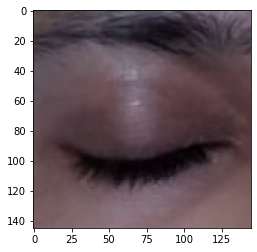

In [5]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread(r"C:\Users\talba\Desktop\deepL/Closed/_0.jpg"));

In [6]:
a = plt.imread(r"C:\Users\talba\Desktop\deepL/yawn/10.jpg")

In [7]:
a.shape


(480, 640, 3)

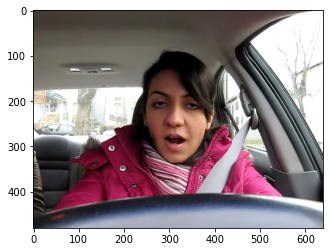

In [8]:
plt.imshow(plt.imread(r"C:\Users\talba\Desktop\deepL/yawn/10.jpg"));

In [9]:
def face_for_yawn(direc=r"C:\Users\talba\Desktop\deepL", face_cas_path=r"C:\Users\talba\Desktop/haarcascade_frontalface_default.xml"):
    yaw_no = []
    IMG_SIZE = 145
    categories = ["yawn", "no_yawn"]
    for category in categories:
        path_link = os.path.join(direc, category)
        class_num1 = categories.index(category)
        print(class_num1)
        for image in os.listdir(path_link):
            image_array = cv2.imread(os.path.join(path_link, image), cv2.IMREAD_COLOR)
            face_cascade=cv2.CascadeClassifier(cv2.data.haarcascades +"haarcascade_frontalface_default.xml")
            faces = face_cascade.detectMultiScale(image_array, 1.3, 5)
            for (x, y, w, h) in faces:
                img = cv2.rectangle(image_array, (x, y), (x+w, y+h), (0, 255, 0), 2)
                roi_color = img[y:y+h, x:x+w]
                resized_array = cv2.resize(roi_color, (IMG_SIZE, IMG_SIZE))
                yaw_no.append([resized_array, class_num1])
    return yaw_no


yawn_no_yawn = face_for_yawn()

0
1


In [10]:
def get_data(dir_path=r"C:\Users\talba\Desktop\deepL", face_cas=r"C:\Users\talba\Desktop/haarcascade_frontalface_default.xml", eye_cas=r"C:\Users\talba\Desktop/haarcascade.xml"):
    labels = ['Closed', 'Open']
    IMG_SIZE = 145
    data = []
    for label in labels:
        path = os.path.join(dir_path, label)
        class_num = labels.index(label)
        class_num +=2
        print(class_num)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([resized_array, class_num])
            except Exception as e:
                print(e)
    return data

In [11]:
data_train = get_data()


2
3


In [12]:
def append_data():
#     total_data = []
    yaw_no = face_for_yawn()
    data = get_data()
    yaw_no.extend(data)
    return np.array(yaw_no)

In [13]:
new_data = append_data()


0
1
2
3


C:\Users\talba\AppData\Local\Temp/ipykernel_11028/2804427426.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(yaw_no)


In [14]:
X = []
y = []
for feature, label in new_data:
    X.append(feature)
    y.append(label)

In [15]:
X = np.array(X)
X = X.reshape(-1, 145, 145, 3)

In [16]:
from sklearn.preprocessing import LabelBinarizer
label_bin = LabelBinarizer()
y = label_bin.fit_transform(y)

In [17]:
y = np.array(y)

In [18]:
from sklearn.model_selection import train_test_split
seed = 42
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, test_size=test_size)

In [19]:
len(X_test)


578

In [20]:
 !pip install tensorflow==2.3.1
 !pip install keras==2.4.3

  Using cached numpy-1.18.5-cp38-cp38-win_amd64.whl (12.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\talba\\AppData\\Local\\Temp\\pip-uninstall-357x3unu\\core\\_multiarray_tests.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [21]:
conda install tensorflow

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [22]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [23]:
tf.__version__


'2.3.0'

In [24]:
import keras
keras.__version__

'2.4.3'

In [25]:
train_generator = ImageDataGenerator(rescale=1/255, zoom_range=0.2, horizontal_flip=True, rotation_range=30)
test_generator = ImageDataGenerator(rescale=1/255)

train_generator = train_generator.flow(np.array(X_train), y_train, shuffle=False)
test_generator = test_generator.flow(np.array(X_test), y_test, shuffle=False)

In [26]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

batch_size = 40
img_height = 256
img_width = 256

In [27]:
# loading training data
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    r'C:\Users\talba\Desktop\deepL',
    validation_split=0.2,
    subset= "training",
   seed=42,
   image_size= (img_height, img_width),
   batch_size=batch_size

)

## loading testing data
testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
r'C:\Users\talba\Desktop\deepL',
    validation_split=0.2,
    subset= "validation",
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

Found 2900 files belonging to 4 classes.
Using 2320 files for training.
Found 2900 files belonging to 4 classes.
Using 580 files for validation.


In [28]:
class_names = training_ds.class_names

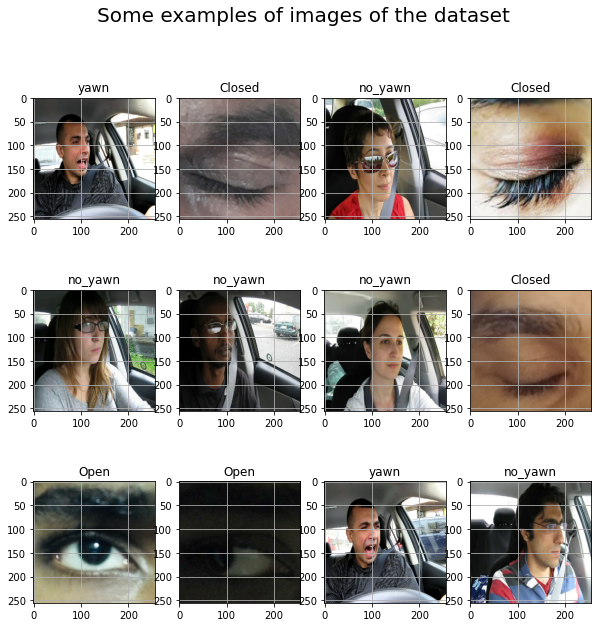

In [29]:
plt.figure(figsize=(10, 10))
for images, labels in training_ds.take(1):
  for i in range(12):
    ax = plt.subplot(3,4 , i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.suptitle("Some examples of images of the dataset", fontsize=20)
    plt.grid(True)

In [30]:
model = Sequential()

model.add(Conv2D(256, (3, 3), activation="relu", input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="softmax"))

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 143, 143, 256)     7168      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 71, 71, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 69, 69, 128)       295040    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 34, 34, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        1

In [31]:
history = model.fit(train_generator, epochs=50, validation_data=test_generator, shuffle=True, validation_steps=len(test_generator))

Epoch 1/50
43/43 [==============================] - 117s 3s/step - loss: 1.1735 - accuracy: 0.4774 - val_loss: 0.7751 - val_accuracy: 0.7111
Epoch 2/50
43/43 [==============================] - 119s 3s/step - loss: 0.5116 - accuracy: 0.7832 - val_loss: 0.4065 - val_accuracy: 0.8080
Epoch 3/50
43/43 [==============================] - 117s 3s/step - loss: 0.3969 - accuracy: 0.8293 - val_loss: 0.3236 - val_accuracy: 0.8720
Epoch 4/50
43/43 [==============================] - 122s 3s/step - loss: 0.3204 - accuracy: 0.8701 - val_loss: 0.2744 - val_accuracy: 0.9083
Epoch 5/50
43/43 [==============================] - 113s 3s/step - loss: 0.3133 - accuracy: 0.8708 - val_loss: 0.3553 - val_accuracy: 0.8685
Epoch 6/50
43/43 [==============================] - 117s 3s/step - loss: 0.2949 - accuracy: 0.8901 - val_loss: 0.2483 - val_accuracy: 0.8875
Epoch 7/50
43/43 [==============================] - 126s 3s/step - loss: 0.2546 - accuracy: 0.8968 - val_loss: 0.2127 - val_accuracy: 0.9083
Epoch 8/50
43

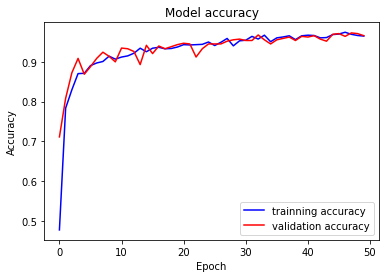

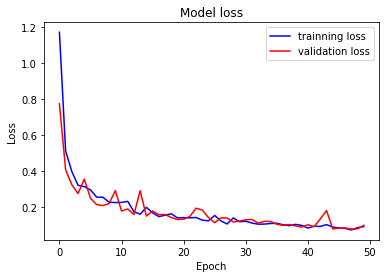

In [32]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [33]:
model.save("drowiness_new6.h5")


In [34]:
model.save("drowiness_new6.model")


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: drowiness_new6.model\assets


In [35]:
prediction = model.predict_classes(X_test)


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [36]:
prediction

array([2, 3, 2, 3, 0, 3, 3, 2, 0, 2, 3, 3, 2, 2, 2, 2, 3, 1, 0, 3, 2, 3,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 1, 3, 3, 2, 2, 3, 2, 3, 2, 3,
       2, 2, 3, 3, 2, 3, 3, 2, 2, 1, 2, 3, 2, 2, 2, 0, 3, 3, 2, 2, 2, 2,
       2, 3, 2, 2, 1, 2, 3, 3, 2, 0, 0, 3, 2, 3, 2, 2, 3, 2, 2, 2, 2, 0,
       3, 2, 2, 3, 2, 3, 1, 2, 3, 0, 3, 3, 3, 2, 3, 0, 2, 3, 2, 0, 2, 2,
       2, 1, 2, 0, 0, 3, 3, 3, 2, 2, 3, 3, 2, 1, 1, 2, 3, 2, 2, 0, 3, 2,
       0, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3,
       3, 1, 1, 2, 3, 1, 2, 2, 2, 3, 2, 3, 3, 2, 3, 2, 3, 1, 2, 0, 3, 2,
       2, 2, 0, 2, 3, 0, 2, 0, 3, 2, 3, 0, 2, 2, 1, 3, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 0, 2, 0, 0, 2, 2, 3, 2, 0, 3, 0, 2, 2, 2, 2, 0, 3, 2, 1,
       1, 0, 2, 3, 3, 3, 3, 0, 0, 2, 2, 2, 3, 3, 0, 3, 3, 2, 3, 3, 0, 1,
       0, 0, 2, 3, 3, 3, 3, 2, 3, 3, 2, 3, 2, 1, 2, 2, 2, 2, 3, 2, 2, 2,
       3, 2, 2, 0, 2, 3, 2, 2, 2, 3, 3, 3, 3, 3, 0, 0, 0, 3, 3, 3, 3, 2,
       2, 2, 2, 2, 2, 3, 2, 0, 2, 2, 0, 3, 2, 3, 1,

In [37]:
labels_new = ["yawn", "no_yawn", "Closed", "Open"]


In [38]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test, axis=1), prediction, target_names=labels_new))

              precision    recall  f1-score   support

        yawn       0.65      0.67      0.66        63
     no_yawn       0.78      0.39      0.52        74
      Closed       0.71      0.99      0.83       215
        Open       0.99      0.77      0.87       226

    accuracy                           0.79       578
   macro avg       0.78      0.70      0.72       578
weighted avg       0.82      0.79      0.78       578



In [39]:
clf_report = classification_report(np.argmax(y_test, axis=1), prediction, target_names=labels_new,output_dict=True)

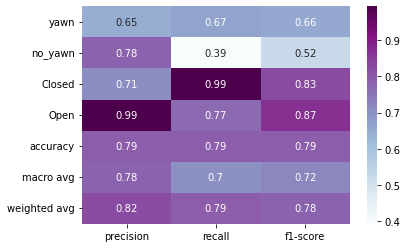

In [40]:
import seaborn as sns
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True,cmap='BuPu');

In [41]:
labels_new = ["yawn", "no_yawn", "Closed", "Open"]
IMG_SIZE = 145
def prepare(filepath, face_cas=r"C:\Users\talba\Desktop/haarcascade_frontalface_default.xml"):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img_array = img_array / 255
    resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return resized_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

model = tf.keras.models.load_model("./drowiness_new6.h5")

The Predicted label 1 indicates not yawning


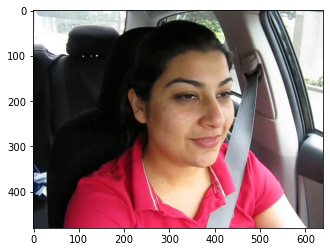

In [42]:
# prepare("../input/drowsiness-dataset/train/no_yawn/1068.jpg")
prediction = model.predict([prepare(r"C:\Users\talba\Desktop\deepL/no_yawn/851.jpg")])
#np.argmax(prediction)
print(f'The Predicted label {np.argmax(prediction)} indicates not yawning')
plt.imshow(plt.imread(r"C:\Users\talba\Desktop\deepL/no_yawn/851.jpg"));

The Predicted label 2 indicates closed 


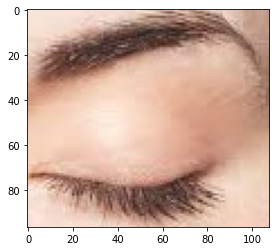

In [43]:
prediction = model.predict([prepare(r"C:\Users\talba\Desktop\deepL/Closed/_667.jpg")])
#np.argmax(prediction)
print(f'The Predicted label {np.argmax(prediction)} indicates closed ')
plt.imshow(plt.imread(r"C:\Users\talba\Desktop\deepL/Closed/_667.jpg"));

The Predicted label 3 indicates Open 


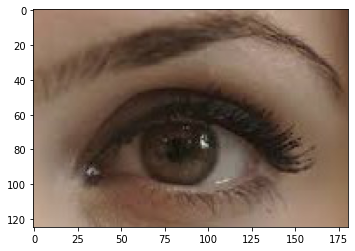

In [44]:
prediction = model.predict([prepare(r"C:\Users\talba\Desktop\deepL/Open/_20.jpg")])
#np.argmax(prediction)

print(f'The Predicted label {np.argmax(prediction)} indicates Open ')
plt.imshow(plt.imread(r"C:\Users\talba\Desktop\deepL/Open/_20.jpg"));

The Predicted label 1 indicates yawn 


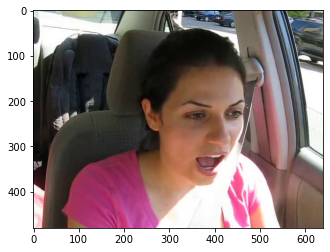

In [45]:
prediction = model.predict([prepare(r"C:\Users\talba\Desktop\deepL/yawn/537.jpg")])
#np.argmax(prediction)
print(f'The Predicted label {np.argmax(prediction)} indicates yawn ')
plt.imshow(plt.imread(r"C:\Users\talba\Desktop\deepL/yawn/537.jpg"));